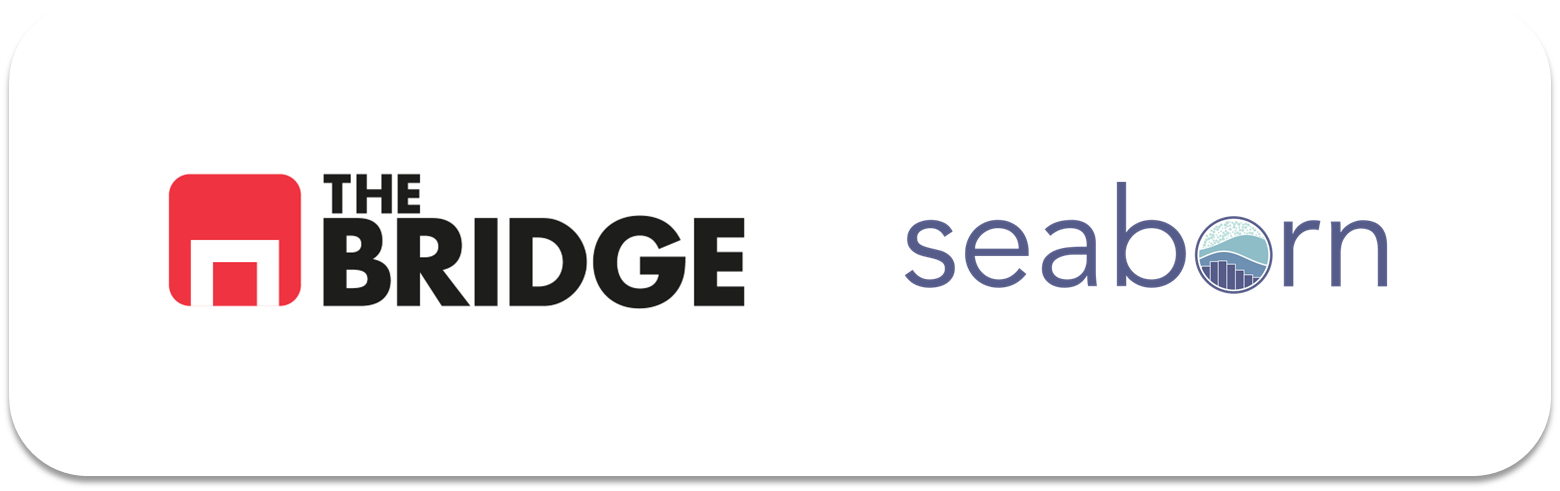

## PRACTICA OBLIGATORIA: VISUALIZACION Y PRESENTACION

* La práctica obligatoria de esta unidad se divide en dos partes, una dedicada a visualización y construcción de funciones, y la otra a hacer una presentación de resultados. Descarga este notebook en tu ordenador y trabaja en local. Ten en cuenta que tendrás que descar los directorios de imágenes y datos adicionales, si los hubiera.
* Recuerda que debes subirla a tu repositorio personal antes de la sesión en vivo para que puntúe adecuadamente.  
* Recuerda también que no es necesario que esté perfecta, sólo es necesario que se vea el esfuerzo. 
* Esta práctica se resolverá en la sesión en vivo correspondiente y la solución se publicará en el repo del curso. 

### Ejercicio 0

Importa los paquetes y módulos que necesites a lo largo del notebook.

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

## #1 VISUALIZACION

### #1.1

Carga el dataset de las ciudades de California que está en la ruta "./data/california_cities.csv". Muestra su contenido, deshazte de las filas con nulos.

In [ ]:
# Se carga el df
df_ciudades = pd.read_csv("./data/california_cities.csv")

# Miramos donde estan los valores nulos
df_ciudades.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 482 entries, 0 to 481
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Unnamed: 0          482 non-null    int64  
 1   city                482 non-null    object 
 2   latd                482 non-null    float64
 3   longd               482 non-null    float64
 4   elevation_m         434 non-null    float64
 5   elevation_ft        470 non-null    float64
 6   population_total    482 non-null    int64  
 7   area_total_sq_mi    480 non-null    float64
 8   area_land_sq_mi     482 non-null    float64
 9   area_water_sq_mi    481 non-null    float64
 10  area_total_km2      477 non-null    float64
 11  area_land_km2       478 non-null    float64
 12  area_water_km2      478 non-null    float64
 13  area_water_percent  477 non-null    float64
dtypes: float64(11), int64(2), object(1)
memory usage: 52.8+ KB


In [5]:
# Eliminamos las filas con nulos y volvemos a obtener la información
df_ciudades.dropna(inplace = True)

df_ciudades.info()

<class 'pandas.core.frame.DataFrame'>
Index: 427 entries, 0 to 481
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Unnamed: 0          427 non-null    int64  
 1   city                427 non-null    object 
 2   latd                427 non-null    float64
 3   longd               427 non-null    float64
 4   elevation_m         427 non-null    float64
 5   elevation_ft        427 non-null    float64
 6   population_total    427 non-null    int64  
 7   area_total_sq_mi    427 non-null    float64
 8   area_land_sq_mi     427 non-null    float64
 9   area_water_sq_mi    427 non-null    float64
 10  area_total_km2      427 non-null    float64
 11  area_land_km2       427 non-null    float64
 12  area_water_km2      427 non-null    float64
 13  area_water_percent  427 non-null    float64
dtypes: float64(11), int64(2), object(1)
memory usage: 50.0+ KB


In [6]:
# Visualización
df_ciudades.head()

,Unnamed: 0,city,latd,longd,elevation_m,elevation_ft,population_total,area_total_sq_mi,area_land_sq_mi,area_water_sq_mi,area_total_km2,area_land_km2,area_water_km2,area_water_percent
0,0,Adelanto,34.576111,-117.432778,875.0,2871.0,31765,56.027,56.009,0.018,145.107,145.062,0.046,0.03
1,1,AgouraHills,34.153333,-118.761667,281.0,922.0,20330,7.822,7.793,0.029,20.260,20.184,0.076,0.37
4,4,Alhambra,34.081944,-118.135000,150.0,492.0,83089,7.632,7.631,0.001,19.766,19.763,0.003,0.01
5,5,AlisoViejo,33.575000,-117.725556,127.0,417.0,47823,7.472,7.472,0.000,19.352,19.352,0.000,0.00
6,6,Alturas,41.487222,-120.542500,1332.0,4370.0,2827,2.449,2.435,0.014,6.342,6.306,0.036,0.57


### #1.2

Crea una función similar a la que se pide en el ejercicio 6 de la segunda tanda de ejercicios del workout. Es decir, una función para pintar diagramas de dispersion que tenga seis argumentos, pero ojo al cambio en el quinto:
1. Un dataframe
2. Una columna numérica del dataframe
3. Una columna numérica del dataframe diferente a la anterior.
4. Un columna categórica (Opcional, valor por defecto None)
5. Un valor para el tamaño de los puntos o una cadena, pero que puede ser una cadena de caracteres, en cuyo caso se debe interpretar como una de las columnas del dataframe cuyos valores deben controlar el tamaño
6. Un sexto argumento "escala", que permita manipular la escala del tamaño en el caso de que el quinto argumento sea una cadena. Este argumento multiplicará a los valores de la columna indicada en el parámetro anterior (así si quiero dividir por 10000, este sexto argumento tendrá que valer 1/10000)

La función debe pintar el diagrama de dispersión de la columna numérica 1, en el eje X, frente a la columna numérica 2, en el eje Y, usando un código de colores en función de la columna categórica y con el tamaño de los puntos según el argumento correspondiente. 

Si no se diera una columna categórica como argumento, el color no debe pasarse como parámetro a la función de Seaborn o Matplotlib que uses.

EXTRA: Añade un argumento que controle si la función pinta una leyenda para colores y tamaños o un colorbar y una leyenda para los tamaños. NO TE PREOCUPES POR EL FORMATO DE LA LEYENDA (lo veremos en la sesión en vivo)

In [24]:
def scatter_plot(df, num_col_x, num_col_y, cat_col=None, point_size=50, scale = 1):
    '''
    Df : dataframe
    num_col_x : columna numérica 1
    num_col_y : columna numérica 2
    cat_col : si quieres añadir una columna categórica
    point_size : tamaño de los puntos en número o una cadena que indique la columna
    scale : escala de los puntos anteriores
    legend_colorbar : legend o colorbar
    '''

    # Tamaño de los puntos según la entrada
    if isinstance(point_size, str):  # Primero ver si es una cadena de caracteres
        point_sizes = df[point_size] * scale # Se debe de tener en cuenta la escala
    else:  # Si simplemente es un numero
        point_sizes = point_size

    # Crear la figura
    plt.figure(figsize=(10, 6))

    if cat_col: # Si hay columna categórica a utilizar
        sns.scatterplot(data=df, x=num_col_x, y=num_col_y, hue=cat_col, size=point_sizes,sizes=(10, 200), palette="viridis", alpha = 0.7, legend=False)
    else:
        # Sin tener en cuenta ninguna columna categórica
        sns.scatterplot(data=df, x=num_col_x, y=num_col_y, size=point_sizes,sizes=(10, 200), color="blue", alpha = 0.7, legend=False)

    # Añadir el título y labels
    plt.title(f"Scatter Plot de {num_col_y} vs {num_col_x}")
    plt.xlabel(num_col_x)
    plt.ylabel(num_col_y)

    # Mostrar la gráfica
    plt.tight_layout()
    plt.show()




### #1.3

Pinta el diagrama de dispersión de longitud y latitud (longitud en las x, latitud en las y) de las ciudades, usando el tamaño de las ciudades para el tamaño de los puntos y los colores para mostrar la población. Previamente crea una columna nueva "log_poblacion" y asignale el log decimal de la poblacion (np.log10() y como argumento los valores de la columna "population_total"). Usa "log_poblacion" para el color.

Un ejemplo de como podría salir para que lo tengas de referencia: (olvidate de la leyenda, auque si quieres como extra puedes intentar ver cómo crearla así)

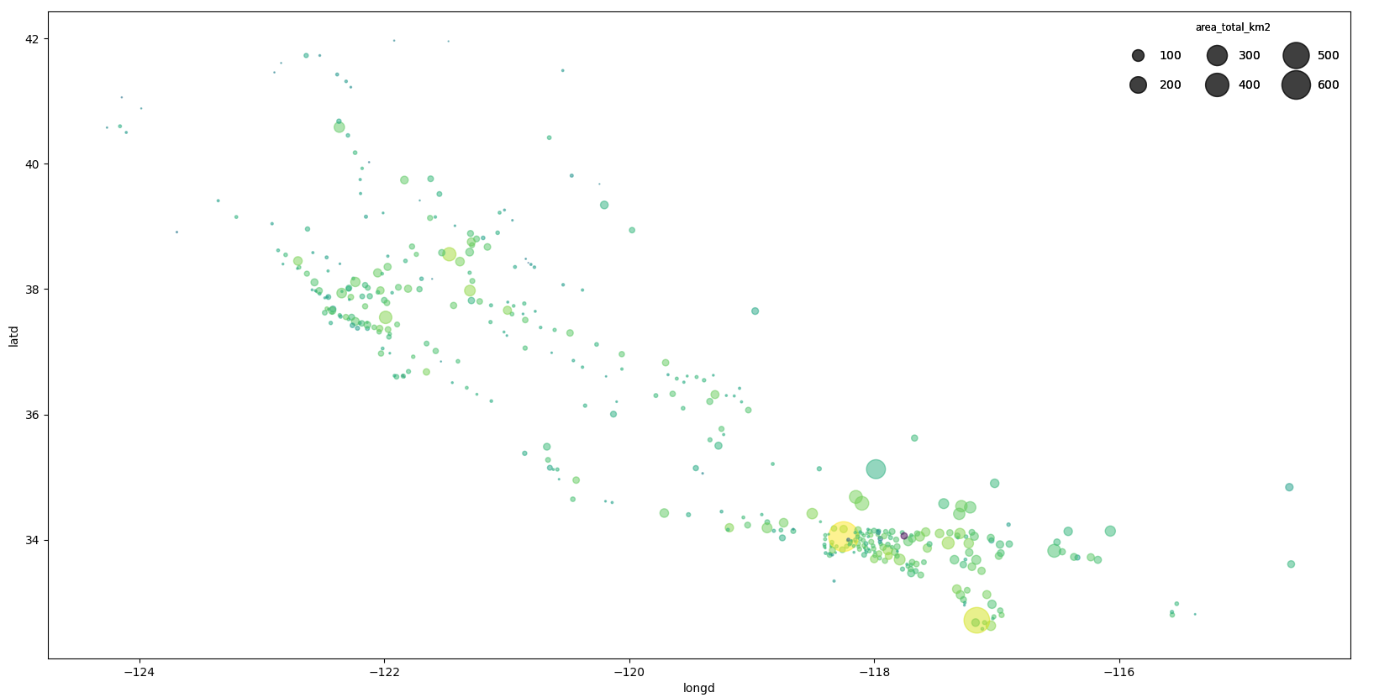

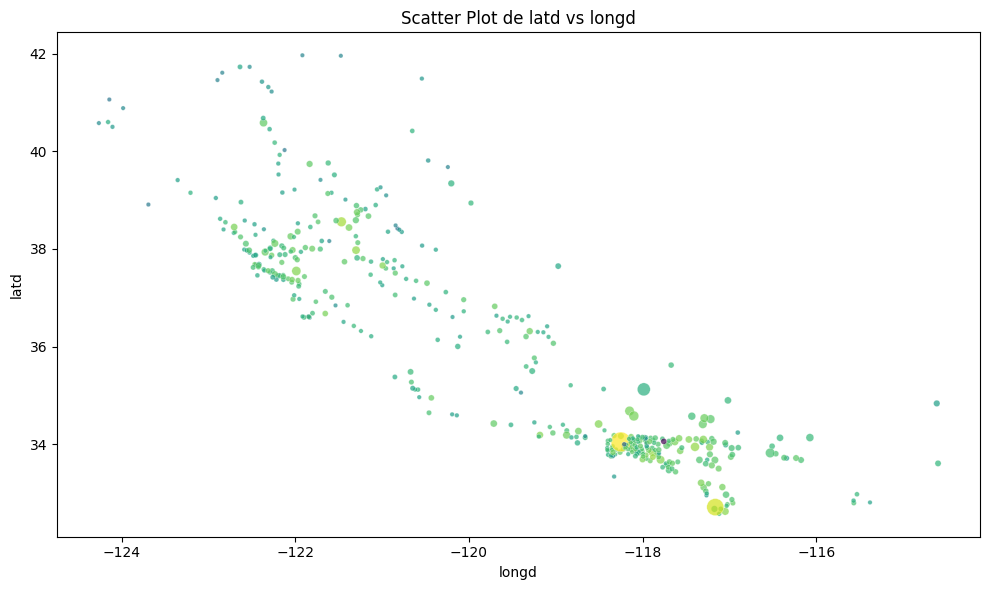

In [25]:
df_ciudades["log_poblacion"] = np.log10(df_ciudades["population_total"])

scatter_plot(df_ciudades, "longd", "latd", cat_col="log_poblacion", point_size="area_total_sq_mi", scale = 1)

## #2: Presentación

En esta parte tendrás que hacer dos cosas, crear una presentación sobre el titanic de no más de 6 slides, sin incluir portada, con los siguientes mensajes y su apoyo en datos:  
1- El titanic fue un accidente con una tasa de mortalidad alta.  
2- En esa ocasión los datos apoyan que se dio el "Las mujeres y los niños primero", pero...  
3- ... que la clase en la que se viajes tuvo una influencia significativa y podría explicar...  
4- ... las diferencias de tasas de supervivencia entre mujeres y niños.    
5- Además aunque el puerto de embarque parece influir, se podría asumir que lo fue el tipo de pasaje que embarcó en cada uno.  

Y generar el notebook con las gráficas que vas a emplear en la presentación. Tienes que entregar ambas cosas.

In [26]:
# Se carga el df
df_titanic = pd.read_csv("./data/titanic.csv")

df_titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


No sobrevivió    61.616162
Sobrevivió       38.383838
Name: proportion, dtype: float64


C:\Users\tebar\AppData\Local\Temp\ipykernel_18736\237446181.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=survival_counts.index, y=survival_counts.values, palette="coolwarm")


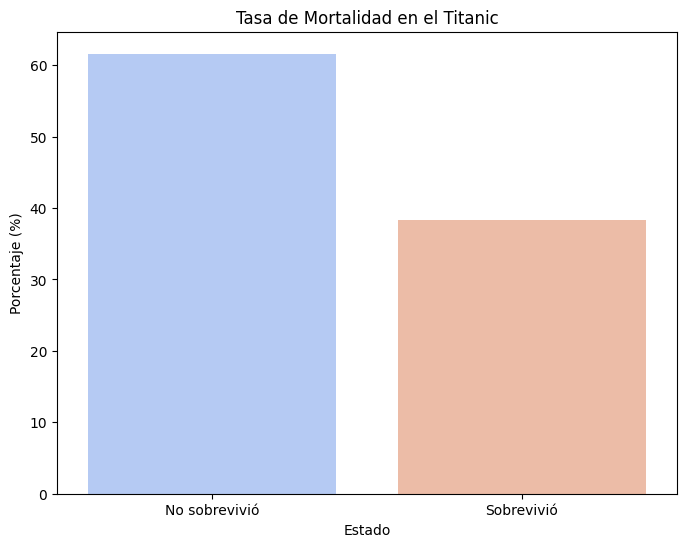

In [ ]:
# Proporción de supervivientes
survival_counts = df_titanic['survived'].value_counts(normalize=True) * 100
survival_counts.index = ['No sobrevivió', 'Sobrevivió']

print(survival_counts) # supervivencia en porcentaje

# Gráfico de barras
plt.figure(figsize=(8, 6))

sns.barplot(x=survival_counts.index, y=survival_counts.values, palette="coolwarm")

plt.title("Tasa de Mortalidad en el Titanic")
plt.ylabel("Porcentaje (%)")
plt.xlabel("Estado")

plt.show()

C:\Users\tebar\AppData\Local\Temp\ipykernel_18736\3160784662.py:4: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(
C:\Users\tebar\AppData\Local\Temp\ipykernel_18736\3160784662.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


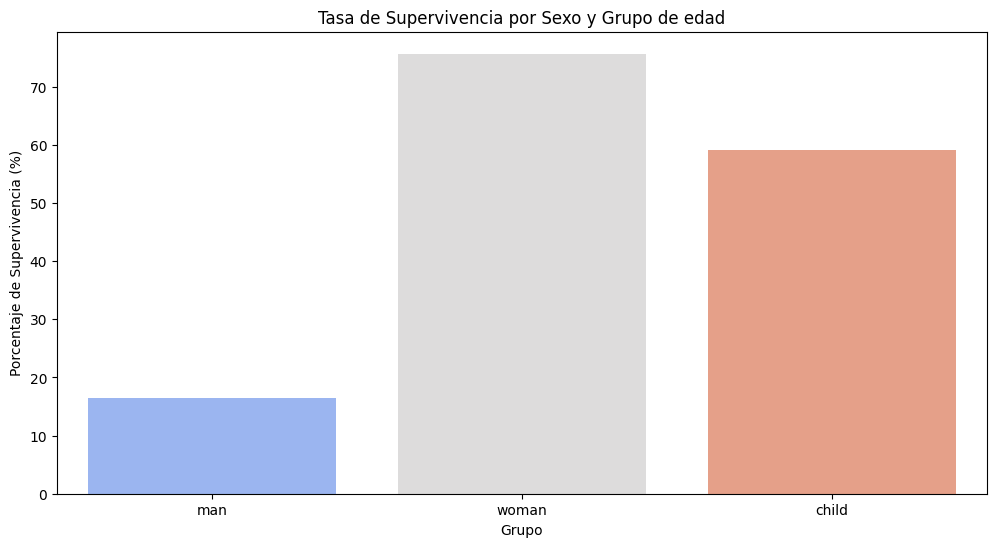

who
child    59.036145
man      16.387337
woman    75.645756
Name: survived, dtype: float64


In [67]:
# Gráfico de Who y supervivencia
plt.figure(figsize=(12, 6))

sns.barplot(
    data=df_titanic, x='who', y='survived', estimator=lambda x: sum(x) / len(x) * 100, ci=None, palette="coolwarm"
)

plt.title("Tasa de Supervivencia por Sexo y Grupo de edad")
plt.ylabel("Porcentaje de Supervivencia (%)")
plt.xlabel("Grupo")

plt.show()

# Calcular los porcentajes
tasa_supervivencia = df_titanic.groupby('who')['survived'].mean() * 100

print(tasa_supervivencia)

C:\Users\tebar\AppData\Local\Temp\ipykernel_18736\610846715.py:4: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(
C:\Users\tebar\AppData\Local\Temp\ipykernel_18736\610846715.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


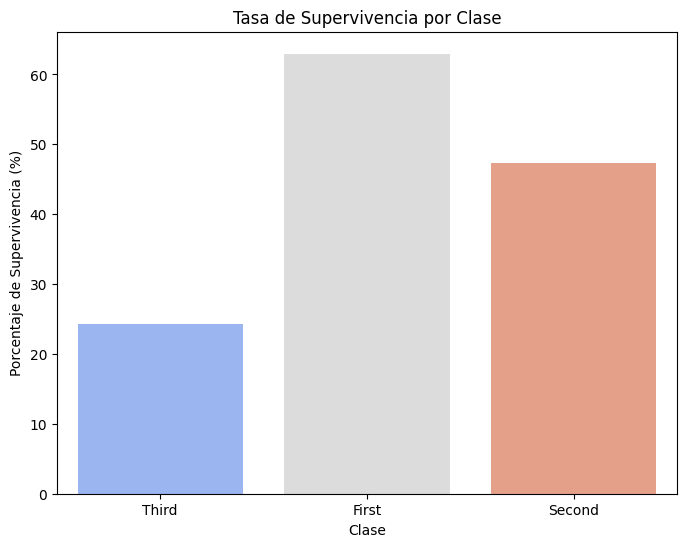

class
First     62.962963
Second    47.282609
Third     24.236253
Name: survived, dtype: float64


In [68]:
# Gráfico de barras por clase
plt.figure(figsize=(8, 6))

sns.barplot(
    data=df_titanic, x='class', y='survived', estimator=lambda x: sum(x) / len(x) * 100, ci=None, palette="coolwarm"
)

plt.title("Tasa de Supervivencia por Clase")
plt.ylabel("Porcentaje de Supervivencia (%)")
plt.xlabel("Clase")

plt.show()

# Calcular el porcentaje
tasa_supervivencia_clase = df_titanic.groupby('class')['survived'].mean() * 100

print(tasa_supervivencia_clase)

C:\Users\tebar\AppData\Local\Temp\ipykernel_18736\636993381.py:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.catplot(


<Figure size 1200x800 with 0 Axes>

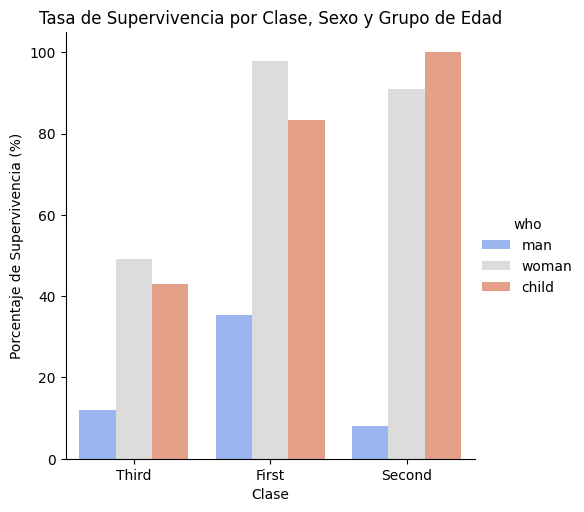

In [62]:
# Gráfico combinado por clase, sexo y grupo de edad
plt.figure(figsize=(12, 8))
sns.catplot(
    data=df_titanic, x="class", hue="who", y="survived", kind="bar", estimator=lambda x: sum(x) / len(x) * 100, ci = None, palette="coolwarm")

plt.title("Tasa de Supervivencia por Clase, Sexo y Grupo de Edad")
plt.ylabel("Porcentaje de Supervivencia (%)")
plt.xlabel("Clase")

plt.show()


C:\Users\tebar\AppData\Local\Temp\ipykernel_18736\3081161890.py:4: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(
C:\Users\tebar\AppData\Local\Temp\ipykernel_18736\3081161890.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


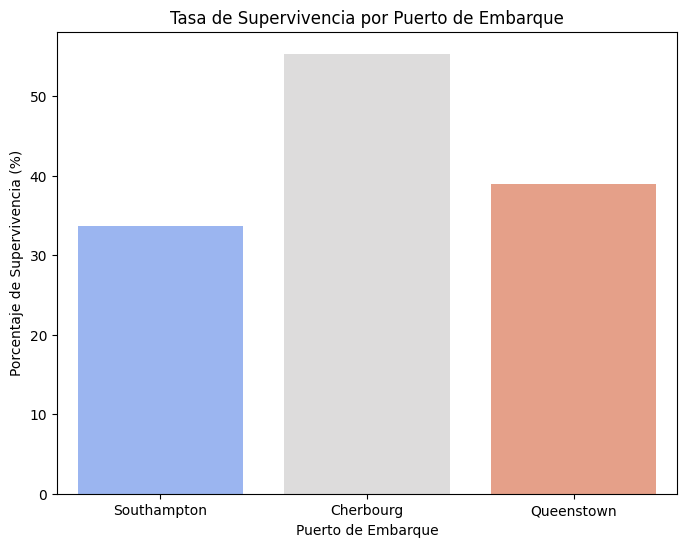

embark_town
Cherbourg      55.357143
Queenstown     38.961039
Southampton    33.695652
Name: survived, dtype: float64


In [69]:
# Tasa de supervivencia por puerto de embarque
plt.figure(figsize=(8, 6))

sns.barplot(
    data=df_titanic, x='embark_town', y='survived', estimator=lambda x: sum(x) / len(x) * 100, ci=None, palette="coolwarm"
)

plt.title("Tasa de Supervivencia por Puerto de Embarque")
plt.ylabel("Porcentaje de Supervivencia (%)")
plt.xlabel("Puerto de Embarque")

plt.show()

# Calcular los porcentajes
tasa_supervivencia_puerto = df_titanic.groupby('embark_town')['survived'].mean() * 100

print(tasa_supervivencia_puerto)

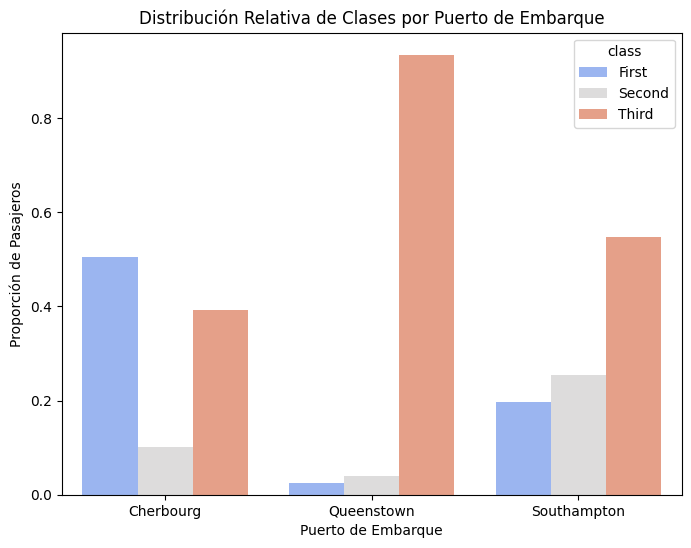

In [ ]:
# Proporción de supervivencia por ciudad de embarque y clase
df_titanic_grouped = df_titanic.groupby(['embark_town', 'class'])['survived'].count().reset_index(name='count')

# Calcular la proporción relativa respecto al total
df_titanic_grouped['proportion'] = df_titanic_grouped.groupby('embark_town')['count'].transform(lambda x: x / x.sum())

# Gráfico de barras con el calculo hecho
plt.figure(figsize=(8, 6))

sns.barplot(
    data=df_titanic_grouped,
    x='embark_town',
    y='proportion',
    hue='class',
    palette="coolwarm"
)

plt.title("Distribución Relativa de Clases por Puerto de Embarque")
plt.ylabel("Proporción de Pasajeros")
plt.xlabel("Puerto de Embarque")

plt.show()

